# Исследование объявлений о продаже квартир

Необходимо проанализировать датасет объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Проверить его на наличие пропусков, аномалий в значениях. Заполнить пропуски по возможности, удалить пропуски не несущие важную информацию если их  доля составляет менее 10% от выборки. После этого приступить к анализу данных. Определить рыночную стоимость объектов, проверить гипотезы влияющие на стоимоть квартир. Получить табличные зависимости, построить графики. Сделать вывод на основе анализа данных.

## Общая информация

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

df1 = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
display(df1.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Описание данных  

`total_images` — число фотографий квартиры в объявлении,  
`last_price` — цена на момент снятия с публикации,  
`total_area` — общая площадь квартиры в квадратных метрах (м²),  
`first_day_exposition` — дата публикации,  
`rooms` — число комнат,  
`ceiling_height` — высота потолков (м),  
`floors_total`— всего этажей в доме,  
`living_area`— жилая площадь в квадратных метрах (м²),  
`floor`— этаж ,  
`is_apartment`— апартаменты (булев тип),  
`studio`— квартира-студия (булев тип),  
`open_plan`— свободная планировка (булев тип),  
`kitchen_area` — площадь кухни в квадратных метрах (м²),  
`balcony` — число балконов,  
`locality_name` — название населённого пункта,  
`airports_nearest`— расстояние до ближайшего аэропорта в метрах (м),  
`cityCenters_nearest` — расстояние до центра города (м),  
`parks_around3000` — число парков в радиусе 3 км,  
`parks_nearest` — расстояние до ближайшего парка (м),  
`ponds_around3000`— число водоёмов в радиусе 3 км,  
`ponds_nearest` — расстояние до ближайшего водоёма (м),  
`ponds_nearest`— расстояние до ближайшего водоёма (м),  
`days_exposition`— сколько дней было размещено объявление (от публикации до снятия).

Объект  DataFrame. 23679 строки, 22 столбца: 

*тип данных bool*- studio, open_plan, 

*тип данных int64* -total_images, rooms, floor,  

*состоят из тестовых данных и имеют тип данных object* -last_price,total_area, first_day_exposition,ceiling_height,floors_total,living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest,     days_exposition.

In [58]:
pd.set_option('display.max_columns',22)
df1.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


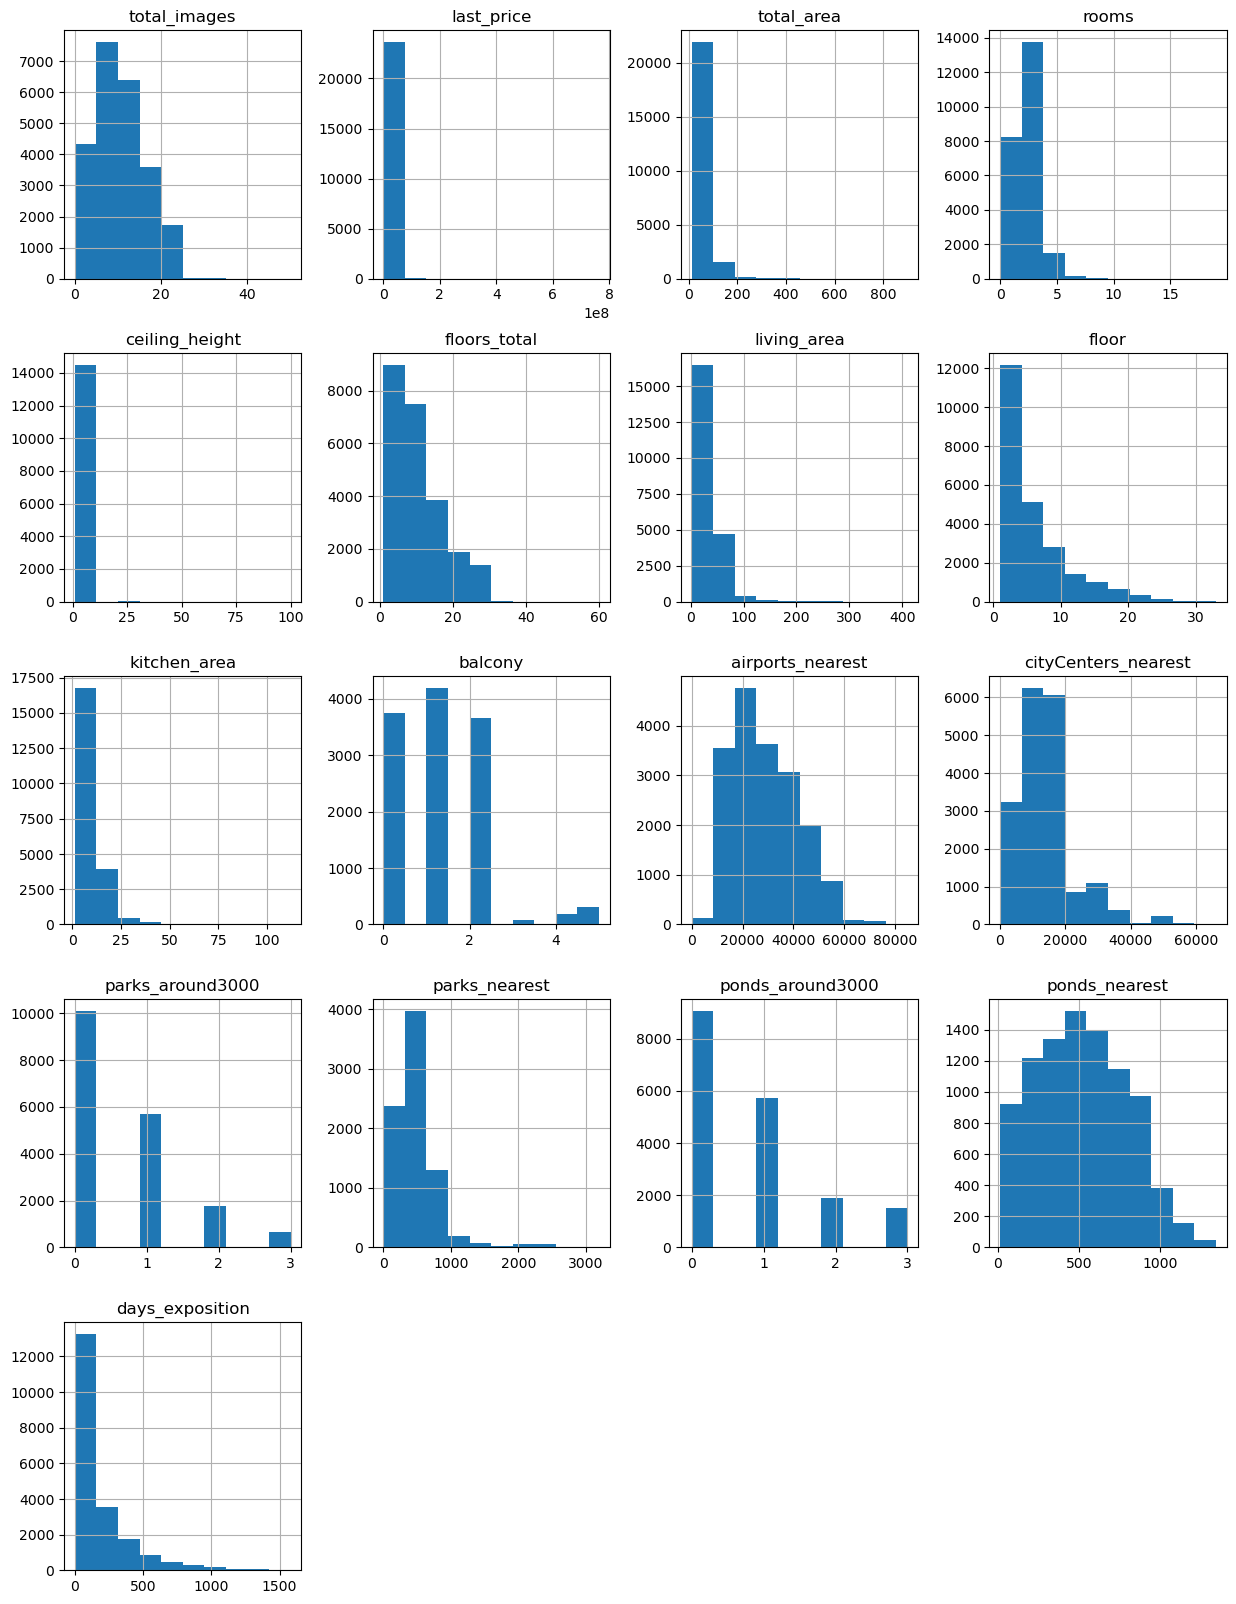

In [59]:
df1.hist(figsize=(15, 20))
plt.show()

Для просмотра статистической сводки каждого столбца, чтобы узнать распределение данных в каждом столбце используем метод describe( ). Этот метод показывает: количество строк в столбце - count, среднее значение столбца - mean, столбец стандартное отклонение - std, минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%. Любые значения NaN автоматически пропускаются.

In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


In [61]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",NaN,NaN,NaN,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00",NaN,NaN,NaN,"6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",NaN,NaN,NaN,60.35,35.65,12.00,40.00,52.00,69.90,900.00
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,"23,699.00",NaN,NaN,NaN,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",NaN,NaN,NaN,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",NaN,NaN,NaN,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",NaN,NaN,NaN,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",NaN,NaN,NaN,5.89,4.89,1.00,2.00,4.00,8.00,33.00
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: в датасете 23679 наблюдений и 22 признака. Присутствуют пропущенные значения. 


## Предобработка данных

In [62]:
# делаем копию датасета, чтобы вносить в неё изменения
df = df1.copy()

In [63]:
# переведем названия всех признаков в нижний регистр через нижнее подчеркивание (по PEP8)
df.columns = [c.replace(" ", "_").lower() for c in df.columns]
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименовали колонку cityСenters_nearest в соответствии с регламентом Python, получили city_centers_nearest	

In [64]:
df.rename(columns={'citycenters_nearest':'city_centers_nearest'}, inplace=True)

In [65]:
# Выведем процент пропущенных значений для каждого столбца датафрейма
pd.DataFrame(df.isna().mean()).sort_values(by=0, ascending=False).style.format('{:.2%}').background_gradient('coolwarm')

,0
is_apartment,88.29%
parks_nearest,65.91%
ponds_nearest,61.56%
balcony,48.61%
ceiling_height,38.80%
airports_nearest,23.38%
city_centers_nearest,23.29%
ponds_around3000,23.28%
parks_around3000,23.28%
days_exposition,13.42%


Посмотрим сколько пропущенных значений в каждой колонке

In [66]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

__Размышления о потенциальных причинах пропусков:__
- Столбец `is_apartment` это апартаменты, в Санкт_Петербурге скорее всего доля таких квартир мала.
- Пропуски в столбцах `parks_nearest`, `ponds_nearest`,`airports_nearest`, `citycenters_nearest`, `ponds_around3000`,
`parks_around3000` заполняются без участия пользователя.
- Отсутствующие значения в `balcony` вызваны отсутствием балконов в данном типе квартир
- Отсутствующие значения в `ceiling_height` обусловлены тем, что пользователи не указали высоту потолков,  пропуски можно заполнить средним значением.
- Отсутствующие значения в `day_exposition` необходимо заполнить пропуски опираясь на год публикации продажи квартиры.
- Отсутствующие значения в `kitchen_area`,`living_area` можно заполнить средним значением.

In [67]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_year'] = df['first_day_exposition'].dt.year
df[df['days_exposition'].isna()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


**Поиск пропущенных значений**


Удалим столбец is_apartment из рассмотрения, поскольку в нём  88% пропущенных значений. Также удалим столбец ponds_nearest, которые характеризуют расположение объекта, так как в этих столбцах много пропущенных значений и значения были введены без участия пользователя. 

In [68]:
print(f'Размер датасета до изменения: {df.shape}')
df = df.drop(['is_apartment','ponds_nearest'], axis=1)
print(f'Размер датасета после изменения: {df.shape}')

Размер датасета до изменения: (23699, 23)
Размер датасета после изменения: (23699, 21)


Cтолбец `balcony` балконы содержит 48% пропусков.   
Столбцы `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`содержат от 23-48% пропусков. Т.к. это картографические данные оставим их без изменений.  

Удалим отсутствующие значения в столбце `locality_name` их 0,21% и пропущенные значения в столбце `floor_total` 0,36%, это менее 10% от общего объема датасета, удалим их.  

`days_exposition` отсутствующие значения оставим как есть, т.к. из 13,42% 

In [69]:
print(f'Размер датасета до изменения: {df.shape}')
nan_columns = ['balcony', 'city_centers_nearest']
for col in nan_columns:
    df[col].fillna(0, inplace=True)
print(f'Размер датасета после изменения: {df.shape}')

Размер датасета до изменения: (23699, 21)
Размер датасета после изменения: (23699, 21)


In [70]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest        0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
days_exposition          3181
first_day_year              0
dtype: int64

Удалим отсутствующие значения в столбце `locality_name` их 0,21%.  
и пропущенные значения в столбце `floor_total` 0,36%

In [71]:
df = df.dropna(subset=['locality_name'])
df = df.dropna(subset=['floors_total'])
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest        0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
days_exposition          3171
first_day_year              0
dtype: int64

Заполним медианным значением высоту потолков в столбце `ceiling_height`, жилую площадь в квадратных метрах (м²) `living_area`, `kitchen_area`

In [72]:
# посмотрим на медианные значения для этих столбцов
columns = ['ceiling_height', 'living_area', 'kitchen_area']
for col in columns:
    print(f'{col} - медиана {df[col].median()}')

ceiling_height - медиана 2.65
living_area - медиана 30.0
kitchen_area - медиана 9.1


In [73]:
# заполним медианой пропущенные значения
columns = ['ceiling_height', 'living_area', 'kitchen_area']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)

In [74]:
df = df.dropna(subset=['locality_name'])
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest        0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
days_exposition          3171
first_day_year              0
dtype: int64

Дополнительная проверка пропусков, выведем процентный список пропущенных данных

In [75]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 0%
floors_total - 0%
living_area - 0%
floor - 0%
studio - 0%
open_plan - 0%
kitchen_area - 0%
balcony - 0%
locality_name - 0%
airports_nearest - 23%
city_centers_nearest - 0%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
days_exposition - 13%
first_day_year - 0%


Столбцы `balcony`, `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`, `days_exposition` имеют тип данных object. Переведен в числовой тип данных, т.к. столбцы характеризуются целочисленными значениями. 
Стратегия обработки: Переведем столбцы в корректный тип данных.  
В тип данных float64: 'balcony', 'total_images', 'rooms','floor','parks_around3000','ponds_around3000', 'days_exposition',
'airports_nearest', 'city_centers_nearest'

In [76]:
print(df['city_centers_nearest'].unique())

[16028. 18603. 13933. ... 27977.  7262.  6263.]


In [77]:
print(f'Размер датасета до изменения: {df.shape}')
columns = ['ceiling_height','kitchen_area','living_area','airports_nearest','city_centers_nearest',
           'parks_around3000','ponds_around3000', 'days_exposition','last_price', 'total_area','balcony', 
           'rooms','floor','floors_total','parks_nearest']
for col in columns:
    df[col] = df[col].astype(float) 
df[columns].dtypes
print(f'Размер датасета после изменения: {df.shape}')
#df.info()

Размер датасета до изменения: (23565, 21)
Размер датасета после изменения: (23565, 21)


In [78]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')

**Вывод:** Избавились от пропусков в датасете. Для каждой колонки был выбран и обоснован свой тип заполнения. Изменили тип данных в столбцах `balcony`

Устранение явных дубликатов

In [79]:
df.duplicated().sum() 

0

**Вывод**: явных дубликатов не найдено

Устранение неявных дубликатов в названиях населённых пунктов.

In [80]:
#выведем уникальные значения столбца locality_name
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [81]:
chars_to_remove = ["посёлок", "поселок","поселок городского типа",
                   "садовое товарищество","городской посёлок","поселок станции",
                   "деревня","село","коттеджный поселок", 'городского типа имени', 'городского типа',
                  'при железнодорожной станции','городского тип','коттеджный','городской',
                   'при железнодорожной станции',' городского типа','городской',' городского типа ',
                  'имени','садоводческое некоммерческое товарищество', 'станции']
for char in chars_to_remove:
   df['locality_name'] = (df['locality_name'].str.replace(char,''))
#удаление пробелов в начале и конце строки
df['locality_name'] = df['locality_name'].str.strip()
print(df['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

**Вывод** Устранили неявных дубликатов в названиях населённых пунктов.

### Добавление новых столбцов


 – цена одного квадратного метра; 

In [82]:
df['square_meter'] =round(df['last_price']/df['total_area'],2)

– день публикации объявления (0 - понедельник, 1 - вторник и т. д.);

In [83]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M:%S.%f') 
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
print(df['day'].unique())

[3 1 4 0 2 6 5]


– месяц публикации объявления;

In [84]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month 
print(df['month'].unique())

[ 3 12  8  7  6  9 11  4  5  2  1 10]


– год публикации объявления;

In [85]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year 
df.head()
print(df['year'].unique())

[2019 2018 2015 2017 2016 2014]


– тип этажа квартиры (значения — «первый», «последний», «другой»);

In [86]:
def f(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == floors_total:
        val = 'последний'
    elif floor == 1:
        val = 'первый'
    else :
       val = 'другой'
    return val
df['type_floor'] = df.apply (f, axis=1)
print(df['type_floor'].unique())  

['другой' 'первый' 'последний']


– расстояние до центра города в километрах.

In [87]:
df['city_centers_nearest'] = round(df['city_centers_nearest']/1000,2)
print(df['city_centers_nearest'].unique()) 

[16.03 18.6  13.93 ... 21.22 24.17 27.98]


**Вывод** Для упрощения дальнейшего анализа данных добавили новые параметры:
 цена одного квадратного метра ;
день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах.

## Исследовательский анализ данных

**Высота потолков**   

Отфильтруем выбивающиеся значения высоты потолков с учетом условия высота потолка менее  5 метров.

In [88]:
shape = df['ceiling_height'].shape [0]
#print('\nDataFrame Shape :', shape) 
#print('\nNumber of rows :', shape[0]) 
print('Количество строк высоты потолков до фильтрации', shape)

print(df['ceiling_height'].unique()) 
df['ceiling_height'] = (df['ceiling_height']).where(df['ceiling_height']<5, df['ceiling_height']/10)
print(df['ceiling_height'].unique()) 
#удаление строки по условию
df  = df[df.ceiling_height < 5]
print(df['ceiling_height'].unique())
df['ceiling_height'].value_counts(dropna=False)

shape_filter = df['ceiling_height'].shape[0] 
print('Количество строк высоты потолков после фильтрации',shape_filter)

Количество строк высоты потолков до фильтрации 23565
[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32
  26.     1.2    8.3    2.

Количество строк высоты потолков не изменилось при фильтрации 23564. С датафреймом можно продолжать работать

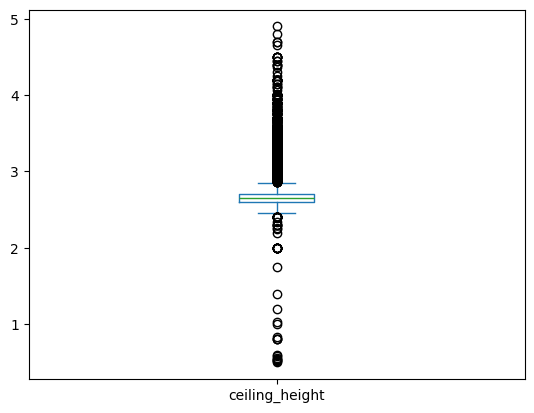

In [89]:
df['ceiling_height'].plot(kind='box')
plt.show()

In [90]:
df['ceiling_height'].describe()

count   23,564.00
mean         2.69
std          0.22
min          0.50
25%          2.60
50%          2.65
75%          2.70
max          4.90
Name: ceiling_height, dtype: float64

**Вывод** Средняя высота потолков в квартирах 2,69 метра. Такая высота потолка отвечает требованиям комфортного проживания.  

**Общая площадь**

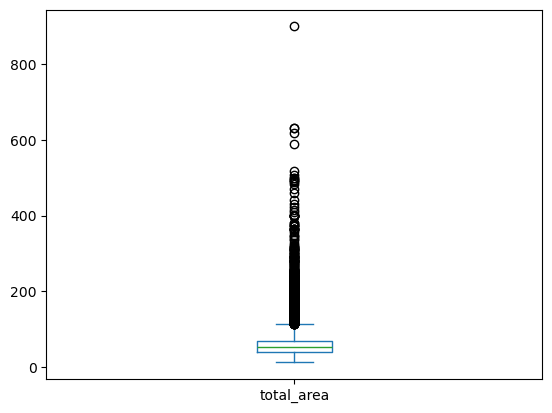

In [91]:
df['total_area'].plot(kind='box')
plt.show()

In [92]:
df['total_area'].describe()

count   23,564.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

Общая площадь квартир в Санкт-Петербурге 60 квадратных метров. Такая площадь вполне комфортна для проживания.

**Жилая площадь**

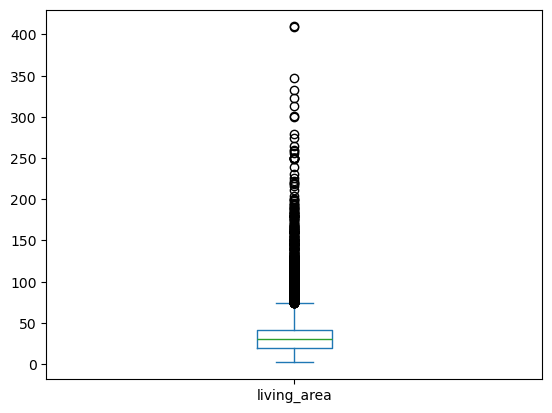

count   23,564.00
mean        34.10
std         21.19
min          2.00
25%         19.00
50%         30.00
75%         41.10
max        409.70
Name: living_area, dtype: float64

In [93]:
df['living_area'].plot(kind='box')
plt.show()
df['living_area'].describe()

Жилая площад квартир в Санкт-Петербурге и соседних населённых пунктах 34 квадратных метра.

**Площадь кухни**


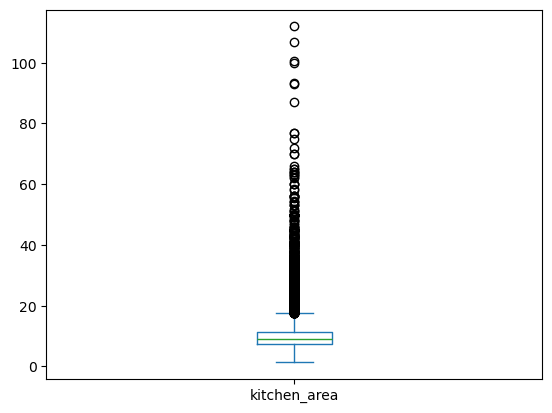

count   23,564.00
mean        10.42
std          5.63
min          1.30
25%          7.30
50%          9.10
75%         11.41
max        112.00
Name: kitchen_area, dtype: float64

In [94]:
df['kitchen_area'].plot(kind='box')
plt.show()
df['kitchen_area'].describe()

Площадь кухни в квартирах в среднем 10 квадратных метров, это вполне отличная площадь кухни.

**Цена объекта**


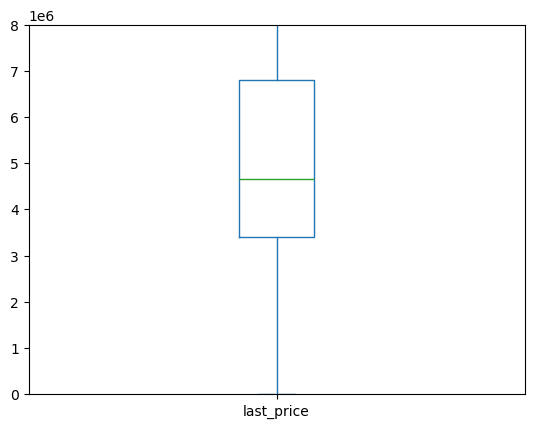

count        23,564.00
mean      6,539,699.24
std      10,911,027.05
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [95]:
df['last_price'].plot(kind='box')
plt.ylim(0,8000000)
plt.show()
df['last_price'].describe()

Цена объекта недвижимости в среднем 6,5 миллионов.

**Количество комнат**


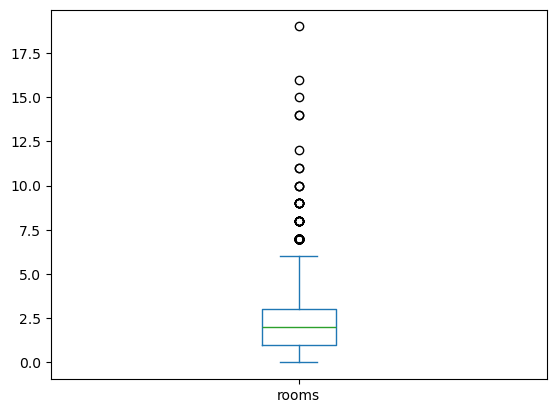

count   23,564.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

In [96]:
df['rooms'].plot(kind='box')
plt.show()
df['rooms'].describe()

Большая часть квартир на рынке недживимости двухкомнатная.

**Общее количество этажей в доме**


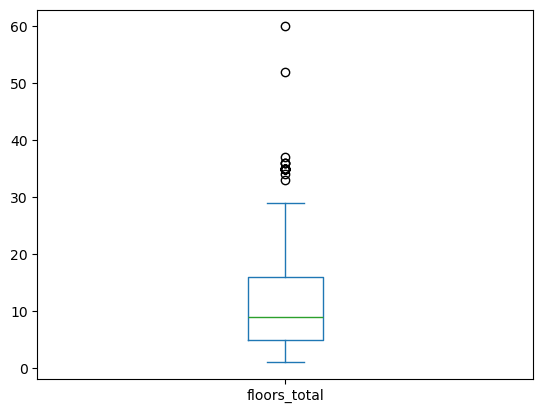

count   23,564.00
mean        10.68
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

In [97]:
#df.info()
df['floors_total'].plot(kind='box')
plt.show()
df['floors_total'].describe()

В среднем в домах 10 этажей, на рынке недвижимости большей частью присутствуют квартиры от первого до 16 этажа. 

**Расстояние до центра города в метрах**


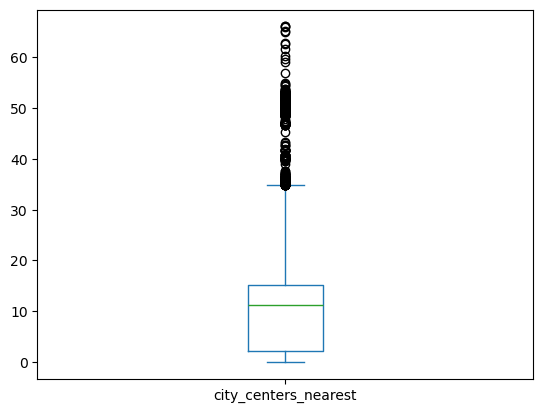

count   23,564.00
mean        10.88
std          9.64
min          0.00
25%          2.19
50%         11.25
75%         15.24
max         65.97
Name: city_centers_nearest, dtype: float64

In [98]:
df['city_centers_nearest'].plot(kind='box')
plt.show()
df['city_centers_nearest'].describe()

Большинство квартир сконцентрированы по продажам от центра города при удаленности от 0 до 15 километров.

**Расстояние до ближайшего парка**

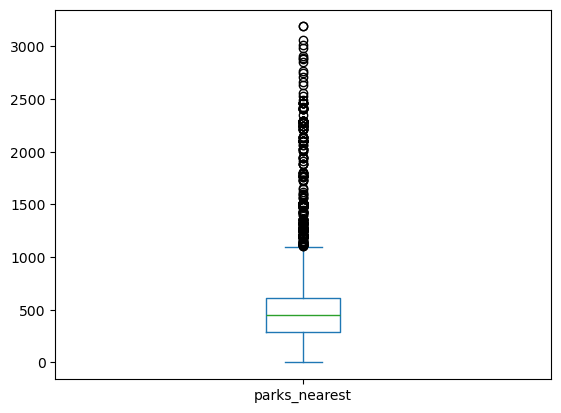

count   8,029.00
mean      490.61
std       341.58
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

In [99]:
df['parks_nearest'].plot(kind='box')
plt.show()
df['parks_nearest'].describe()

При покупке квартир учитывается расстояние до парков. Расстояние 500 метров имеет самое популярное значение.

***Изучение скорости продажи квартир***
   

count   20,393.00
mean       180.75
std        219.74
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64
Продажа квартир медианное значение 95.0


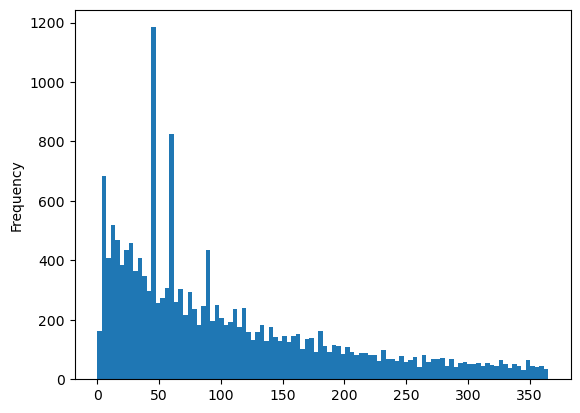

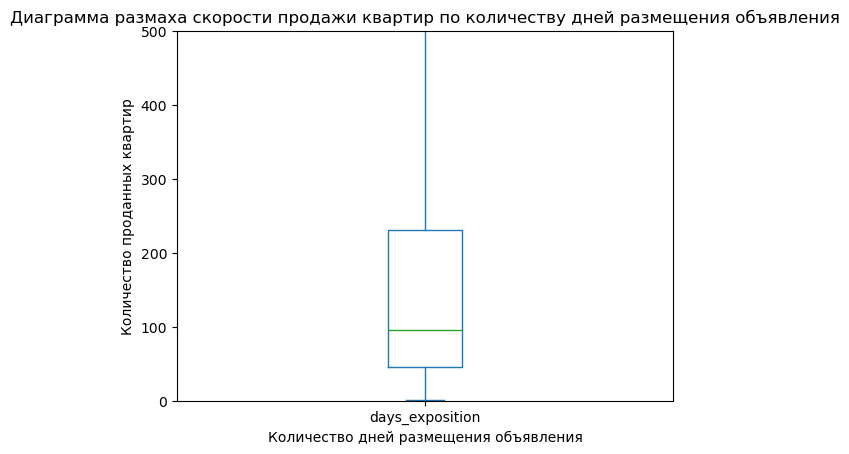

(23564,)

In [100]:
print(df['days_exposition'].describe())
print('Продажа квартир медианное значение',df['days_exposition'].median())
#print(df['days_exposition'].value_counts()) 
df['days_exposition'].plot(kind='hist', bins=100, range=(0,365))
plt.show()
df['days_exposition'].plot(kind='box')
plt.title('Диаграмма размаха скорости продажи квартир по количеству дней размещения объявления')
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество проданных квартир')
plt.ylim(0,500)
plt.show()
df['days_exposition'].shape

**Вывод**
Быстрая продажа, когда объект недвижимости продается от одного дня до полутора месяцев. Долгая продажа объекта недвижимости  более семи месяцев. Обычная продажа квартиры занимает 2 месяца. Максимальное время продажи квартир около 4 лет. 


Видим пики на гистограмме на 45, 60,90 днях продажи, перейдя по ссылке условия размещения объевлений в Яндекс недвижимости видим, что по условиям размещения срок публикации объявлений по продажам квартир истекает до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней. Удалим эти строки из датафрейма по этим дням.

In [101]:
publication_deadline_expired = [45,60,90]
filter_days_exposition =df.query('(days_exposition != 45) & (days_exposition != 60) &(days_exposition != 90)')
print(filter_days_exposition['days_exposition'].describe())
filter_days_exposition.shape

count   19,855.00
mean       184.02
std        221.78
min          1.00
25%         44.00
50%        100.00
75%        238.00
max      1,580.00
Name: days_exposition, dtype: float64


(23026, 26)

**Вывод** Быстрая продажа, когда объект недвижимости продается от одного дня до полутора месяцев. Долгая продажа объекта недвижимости более восьми  месяцев. Обычная продажа квартиры занимает 3 месяца. После очистки датафрейма значения по продажам изменились.

***Определение факторов, которые больше всего влияют на общую стоимость объекта»***

**Общая площадь**

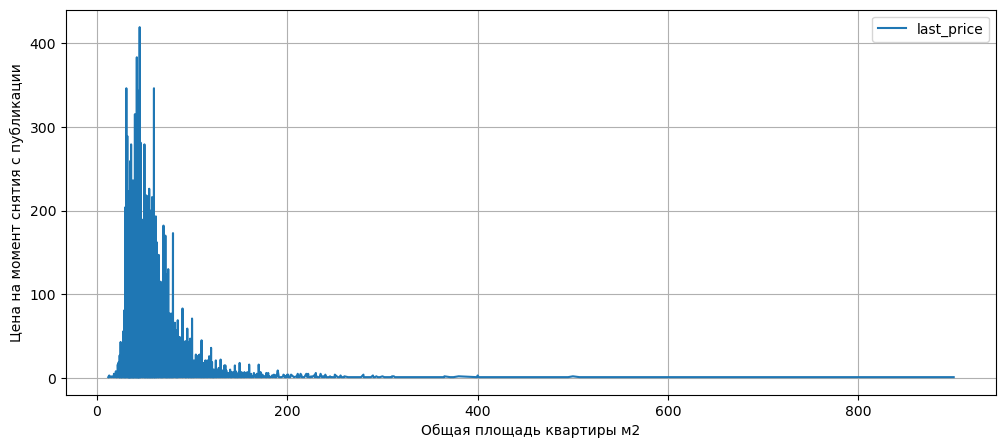

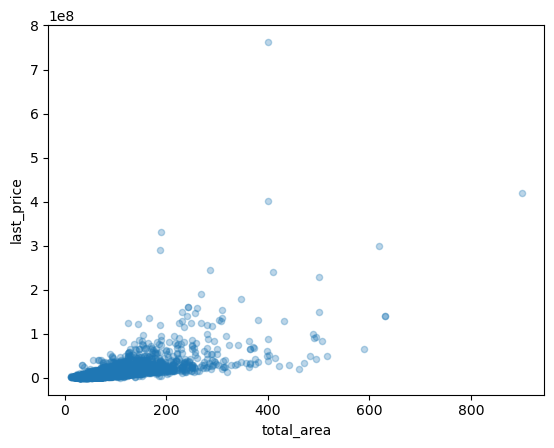

Коэффициент корреляции 0.6536759424479062


In [102]:
df.pivot_table(index='total_area', values='last_price',aggfunc='count').plot(grid=True, figsize=(12,5))
plt.xlabel('Общая площадь квартиры м2')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции', df['total_area'].corr(df['last_price']))

Общая площадь квартиры существенно влияет на ее цену. 

**Жилая площадь**

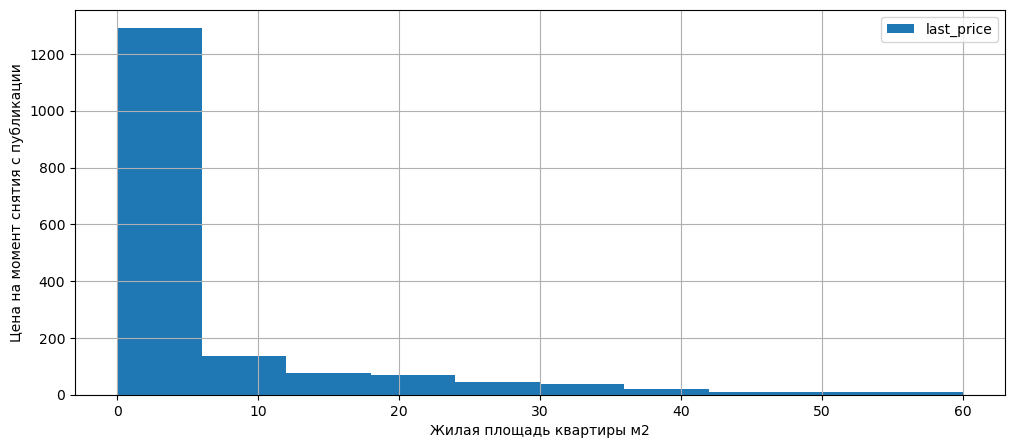

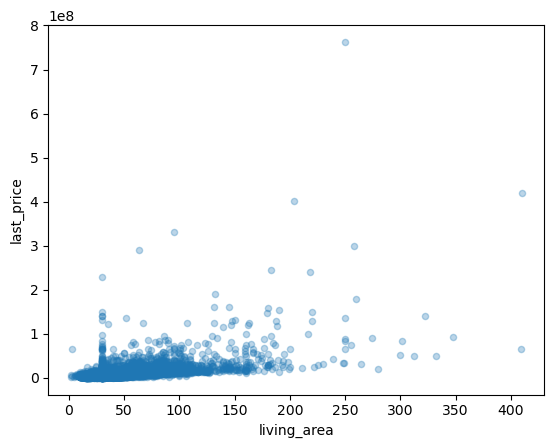

Коэффициент корреляции 0.5406562114684907


In [103]:
df.pivot_table(index='living_area', values='last_price',aggfunc='count').plot(grid=True, figsize=(12,5),kind='hist', range=(0,60))
plt.xlabel('Жилая площадь квартиры м2')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции', df['living_area'].corr(df['last_price']))

Жилая площадь квартиры меньше влияет на цену квартиры. Люди чаще учитывают при покупке общую площадь.

**Площадь кухни**

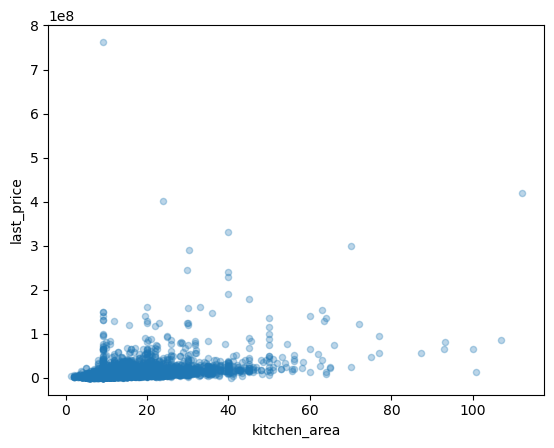

Коэффициент корреляции 0.44069743047967364


In [104]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции', df['kitchen_area'].corr(df['last_price']))

Площадь кухни не сильно влияет на цену продажи квартиры.

**Количество комнат**

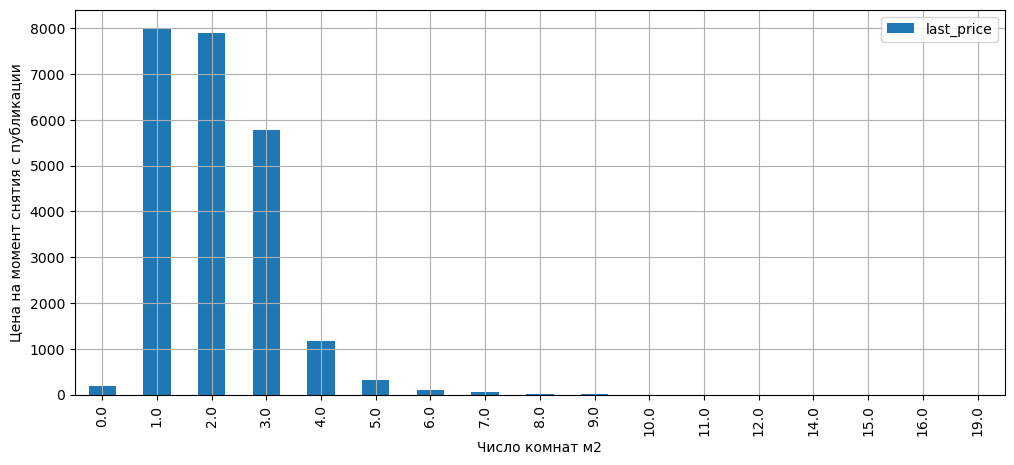

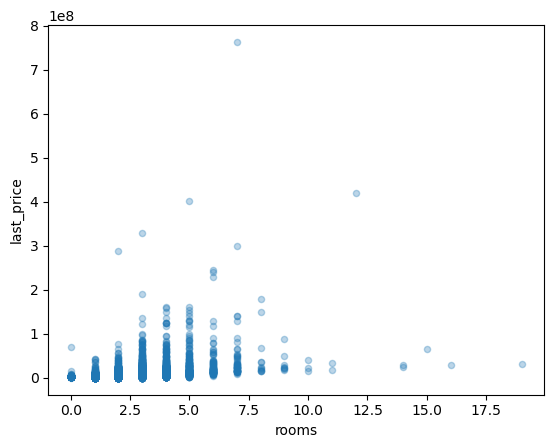

Коэффициент корреляции 0.3632354409895201


In [105]:
df.pivot_table(index='rooms', values='last_price',aggfunc='count').plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('Число комнат м2')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции', df['rooms'].corr(df['last_price']))

Чаще всего на рынке недвижимости встречаются одно и двухкомнатные квартиры.

**Тип этажа**

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'city_centers_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'days_exposition',
       'first_day_year', 'square_meter', 'day', 'month', 'year', 'type_floor'],
      dtype='object')


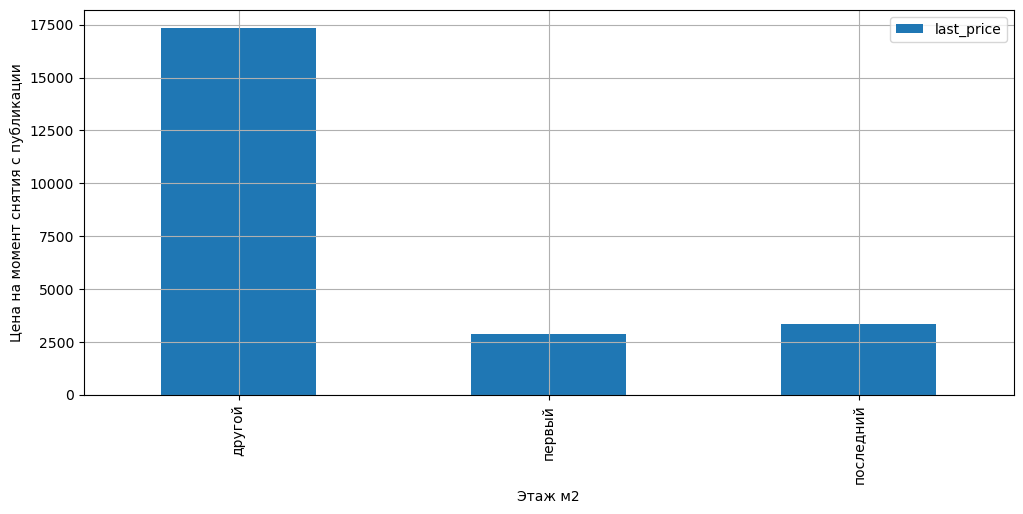

In [106]:
print(df.columns)
df.pivot_table(index='type_floor', values='last_price',aggfunc='count').plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('Этаж м2')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()


Чаще всего покупают квартиры не на первом и последнем этажах.

**Дата размещения**

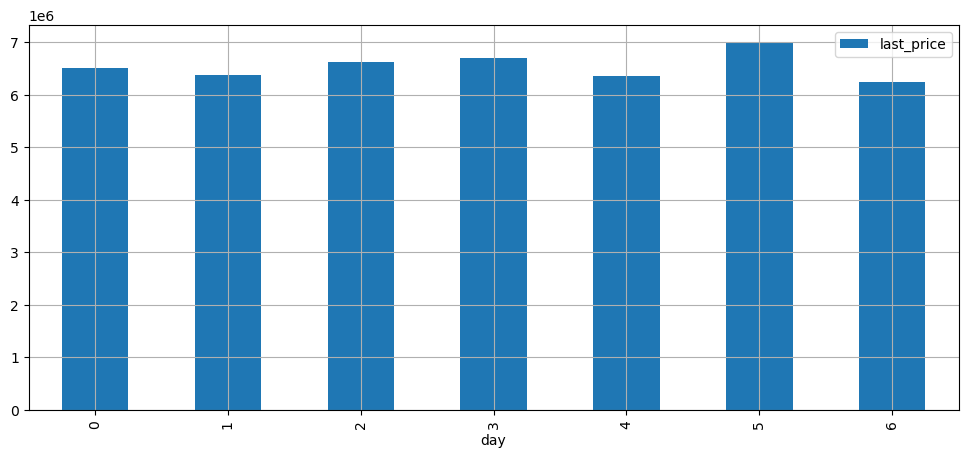

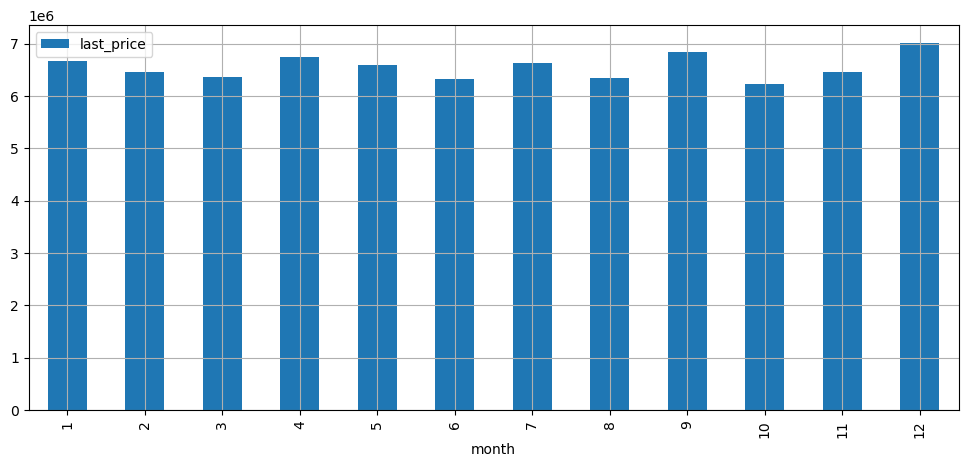

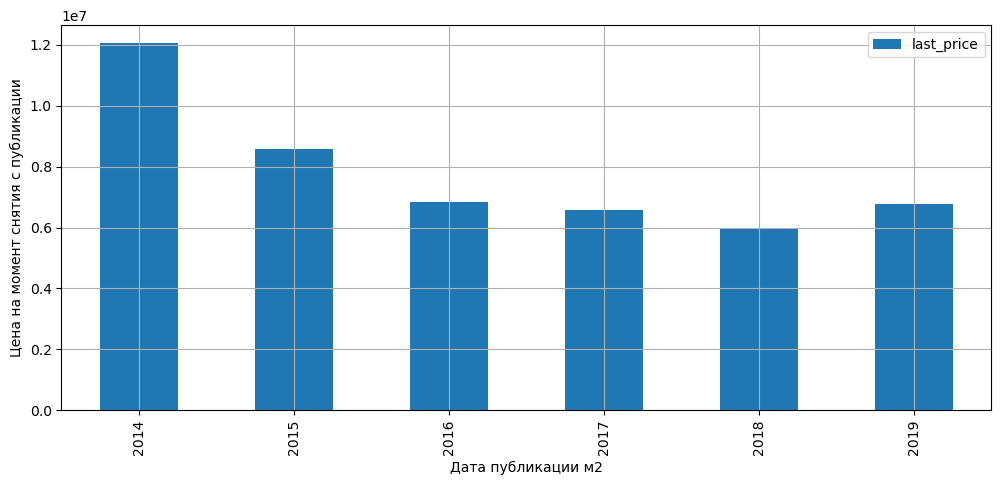

In [107]:
df.pivot_table(index=['day'], values='last_price').plot(kind='bar', grid=True, figsize=(12,5))
df.pivot_table(index=['month'], values='last_price').plot(kind='bar', grid=True, figsize=(12,5))
df.pivot_table(index=['year'], values='last_price').plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('Дата публикации м2')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()


2014 год самый продуктивный по продажам квартир. Пик продаж квартир приходится на декабрь, видимо большинство получает 13 зарплату или премию перед новым годом и покупает квартир. Субота самый продуктивный день по продажам, т.к. у большинства людей суббота выходной день, а мфц и банки работают.

***Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений***
 

                 square_meter
locality_name                
Санкт-Петербург    114,837.88
Пушкин             103,125.82
Кудрово             95,260.85
Парголово           90,175.91
Мурино              86,041.12
Шушары              78,551.34
Колпино             75,424.58
Гатчина             68,746.15
Всеволожск          68,654.47
Выборг              58,141.91


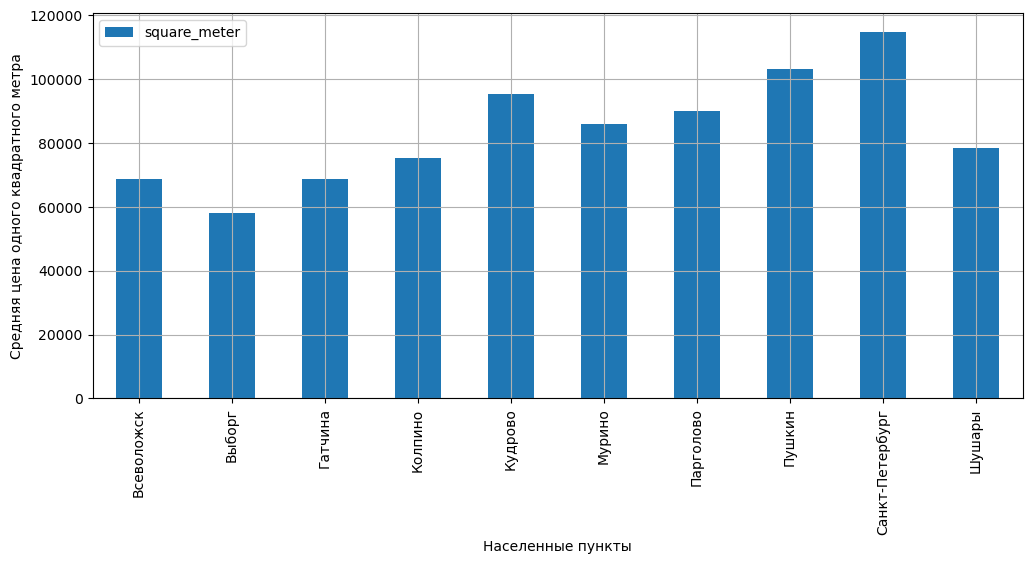

In [108]:
#отфильтруем пункты с наибольшим числом объявлений
# подсчет количества повторов
#показывает сколько раз значения повторяются в столбце
df['locality_name'].value_counts() 
# создает столбец с количеством повторов значений
df['locality_name_replays'] = df.groupby('locality_name')['locality_name'].transform('count')
df.head()
#создание сводной таблицы со средней ценой одного квадратного метра 
e=df.query('locality_name_replays >= 237').pivot_table(index='locality_name', values='square_meter', aggfunc='mean')

#сортировка датафрейма со средней ценой одного квадратного метра по убыванию
print(e.sort_values(by='square_meter', ascending=False))


(
    df.query('locality_name_replays >= 237')
    .pivot_table(index='locality_name', values='square_meter', aggfunc='mean')
    .plot(kind='bar', grid=True, figsize=(12, 5), label='locality_name')
)
plt.xlabel('Населенные пункты')
plt.ylabel('Средняя цена одного квадратного метра')
plt.legend()
plt.show()

В Выборге самая низкая цена за квадратынй метр. В Санкт-Петербурге самая высокая цена квадратного метра.

***Ранжированиете квартир в Санкт-Петербургена разном удалении от центра, вычисление средней стоимоти квартир***


In [109]:
#сводная таблица зависимости средней стоимости картир по удаленности от центра
df['city_centers_nearest_rnd'] = df['city_centers_nearest'].apply(lambda x: math.floor(x))
st_petersburg = df.query('locality_name=="Санкт-Петербург"')
pd.options.display.float_format ='{:,.2f}'.format    
pd.pivot_table(st_petersburg, index='city_centers_nearest_rnd', values='last_price', aggfunc= 'mean')

,last_price
city_centers_nearest_rnd,
0,"20,375,722.01"
1,"18,814,035.14"
2,"16,319,007.48"
3,"13,427,229.79"
4,"13,577,958.90"
5,"15,287,574.02"
6,"14,396,874.80"
7,"12,870,959.05"
8,"8,404,540.29"


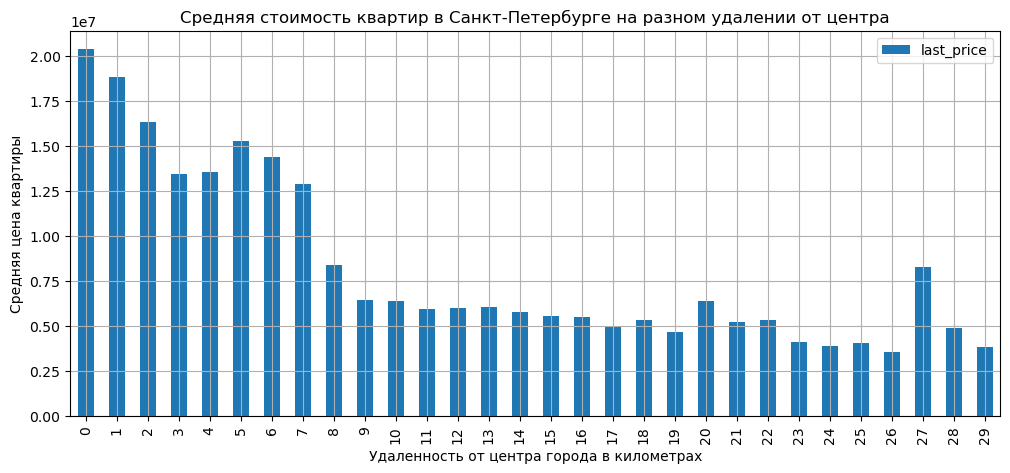

In [110]:
(
    st_petersburg
    .pivot_table(index='city_centers_nearest_rnd', values='last_price', aggfunc= 'mean')
    .plot(grid=True, figsize=(12, 5), kind='bar')
)
plt.title('Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра')
plt.xlabel('Удаленность от центра города в километрах')
plt.ylabel('Средняя цена квартиры')
plt.show()

Чем ближе квартира к центру города, тем выше стоимоть квартиры.

## Вывод

Проведен анализ объявлений о продаже квартир. лю
Данные  получены от сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и его пригородах.
- Рыночная стоимость объектов недвижимости в первую очередь зависит от *общей площади квартиры*, также на стоимость квартиры 
влияют жилая площадь, площадь кухни, количество комнат, тип этажа.  
- Цена квартиры снижается от дня публикации объявления, чем дольше квартира не продается, тем ниже становится ее цена.
- Близость к центру города существенно влияет на цену продажи квартиры.  

Покупатели предпочитают приобретать квартиры с высотой потолков не ниже 2,65, площадью кухни 10 метров квадратных, не дальше 8 километров от центра города. Популярными этажами являются любые, кроме первого и последнего. В народе ходит пословица не первый, не последний, не угловая, не торцевая квартира. 
Популярные квартиры по количеству комнат одно, двух и трехкомнатные.
Лучший год по продажам 2014, Лучший месяц декабрь и большинсво продаж происходит по субботам.  Обычно продажа квартиры занимает 3 месяца.
 

